In [310]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import quandl as Q
import numpy as np
Q.ApiConfig.api_key = 'E2cgCqvy-4eK9xA_MuV5'

def allocate_funds(allocs, portfolio_allocation):
    return portfolio_allocation * allocs

def get_data(symbols,dates):
    df = pd.DataFrame(index=dates)
    
    for symbol in symbols:
        data = Q.get(symbol)
        data = data.filter(items=['Date','Adj_Close']).rename(columns={'Adj_Close':symbol})
        df = df.join(data)
    return df.dropna()

def normalize_df(df):
    normalized_data = df/df.iloc[0,:]
    #print(normalized_data)
    return normalized_data
    
def plot_data(df, title="Portfolio over 2010"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Portfolio Value")
    plt.show()
    
def compute_daily_returns(df):
    drv = df.copy()
    drv[1:] = (drv[1:]/drv[:-1].values) - 1
    drv.iloc[0] = 0
    return drv
    
def show_stocks():
    dates = pd.date_range('2010-01-01', '2011-01-01')
    symbols = ['EOD/AAPL', 'EOD/XOM', 'EOD/MSFT']
    sv = 1000000
    allocs = np.array([0.3,0.3,0.4])
    stock_prices = get_data(symbols, dates)
    
    normalized_data = normalize_df(stock_prices)
    portfolio_allocation = allocate_funds(normalized_data, allocs)
    
    alloc_vals = sv * portfolio_allocation
    portfolio_vals = alloc_vals.sum(axis=1)
    
    daily_returns = compute_daily_returns(portfolio_vals)
    average_daily_returns = daily_returns.mean()
    std_daily_returns = daily_returns.std()
    
    sharpe_ratio = average_daily_returns/std_daily_returns
    cum_return= (portfolio_vals[-1]/portfolio_vals[0]) - 1
    print("Start Date: 2010-01-01", 
          "End Date: 2010-12-31",  
          "Symbols: {}".format(symbols),
          "Allocations: {}".format(allocs),
          "Sharpe Ratio: {}".format(sharpe_ratio),
          "Volatility (stdev of daily returns): {}".format(std_daily_returns),
          "Average Daily Return: {}".format(average_daily_returns),
          "Cumulative Return: {}".format(cum_return),sep="\n")
    plot_data(portfolio_vals)

Start Date: 2010-01-01
End Date: 2010-12-31
Symbols: ['EOD/AAPL', 'EOD/XOM', 'EOD/MSFT']
Allocations: [0.3 0.3 0.4]
Sharpe Ratio: 0.051415246840229176
Volatility (stdev of daily returns): 0.01191041101459695
Average Daily Return: 0.0006123767222840866
Cumulative Return: 0.14619430311629178


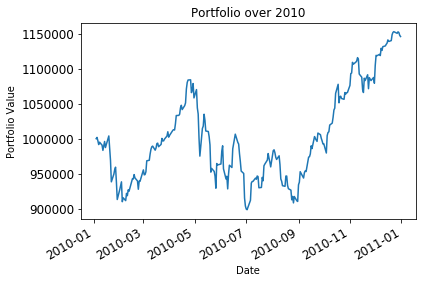

In [311]:
if __name__ == "__main__":
    show_stocks()